In [63]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import Nucleaseq_data_processing as processing
reload(processing)
import create_fake_data as cr
reload(cr)
sys.path.append('../code_general_Finkelsteinlab')
import plotting_Finkelsteinlab as pltData
reload(pltData);
from scipy.optimize import curve_fit

model_ID = ['Clv_Saturated_general_energies_v2','general_energies_no_kPR']
times = [0.0,12.0,60.0,180.0,600.0,1800.0,6000.0,18000.0,60000.0]
guide = 20

path_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename_data = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

### Show result of fit

0      308174.0
1      361381.0
2      308465.0
3      339874.0
4      514405.0
5      458755.0
6      278085.0
7      383925.0
8      293069.0
9      311756.0
10     372003.0
11     340445.0
12     359588.0
13     414856.0
14     367974.0
15     291532.0
16     350726.0
17     307381.0
18     308689.0
19     243964.0
20     295610.0
21     306049.0
22     329601.0
23     312173.0
24     304650.0
25     313661.0
26     281072.0
27     318726.0
28     318543.0
29     292615.0
         ...   
394    143996.0
395    143063.0
396    130570.0
397    132757.0
398    148698.0
399    134884.0
400    134711.0
401    132064.0
402    136821.0
403    139635.0
404    139327.0
405    133676.0
406    131564.0
407    131095.0
408    127989.0
409    127833.0
410    133270.0
411    132779.0
412    130848.0
413    130204.0
414    129760.0
415    136716.0
416    136211.0
417    134368.0
418    131803.0
419    129333.0
420    131788.0
421    129894.0
422    133189.0
423    131017.0
Name: Potential, Length:

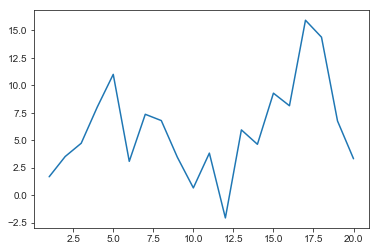

In [193]:
filename = 'fit_1_4_2019_sim_5.txt'
path = '../fits_Stijn/1_4_2019/'
data = pd.read_table(path+filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 44']
final_par_np = final_par.values
chi = data.loc[:,'Potential']
par1 = data.loc[:,'Parameter 4']
par2 = data.loc[:,'Parameter 7']
data.tail()
#plt.plot(range(0,21),-np.cumsum(final_par_np[0:21]),'r')
#final_par_np[25] =9.3
#final_par_np[20] = 5.0
#final_par_np[8] = 0.0
#final_par_np[9] = 2.8
#final_par_np[26] = 10.0
#final_par_np[30] = 6.0
plt.plot(range(1,21),-np.cumsum(final_par_np[1:21]))
#plt.legend(['fit','altered fit'])
#plt.title('Energy landscape')
print np.round(chi)

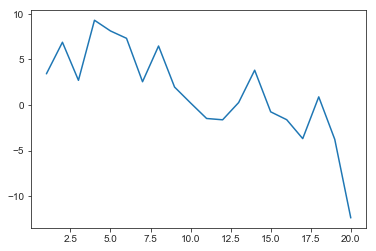

In [197]:
filename = '../data/22_3_2019/fit_22_3_2019_sim_' + '7' + '.txt'
data = pd.read_table(filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 43']
final_par_np = final_par.values
all_par = np.zeros(44)
all_par[0:43] = final_par_np
all_par[43] = 3.0
final_par_np = all_par

plt.plot(range(1,21),-np.cumsum(final_par_np[1:21]))

### Errorbars, weighted average kclv

In [66]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data)
_, ydatamedian, yerrmedian = processing.prepare_multiprocessing_nucleaseq(filename, path_to_data, True)

datacompclv = []
datacompon = []
pos = []
kclv = []
kon = []
error = []
kclvmedian = []
errormedian = []
logerror = np.zeros([2,21])

i = 1
while i < guide+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            pos.append(xdata[a][0])
            kclv.append(np.average(ydata[a][0], weights=np.reciprocal(yerr[a][0]) ))
            kon.append(np.average(ydata[a][1], weights=np.reciprocal(yerr[a][1]) ))
            kclvmedian.append(ydatamedian[a][0])
            error.append(np.mean(yerr[a][0]))
            #error.append(np.std(ydata[a][0]))
            errormedian.append(yerrmedian[a][0])
            datacompclv.append(ydata[a][0])
            datacompon.append(ydata[a][1])
            
            errors_sqrlog = np.zeros(len(yerr[a][0]))
            for j in range(len(yerr[a][0])):
                errors_sqrlog[j] = np.log10(yerr[a][0][j])**2
            error_meanlog = 1.253*np.sqrt(np.sum(errors_sqrlog)/(len(yerr[a][0])**2))
                     
            logerror[0][i-1] = ydatamedian[a][0] - (10**(np.log10(ydatamedian[a][0])-error_meanlog))
            logerror[1][i-1] = 10**(np.log10(ydatamedian[a][0])+error_meanlog) - ydatamedian[a][0]
            
            i = i + 1
    
pos.append(21)
kclv.append(np.average(ydata[0][0], weights=np.reciprocal(yerr[0][0])))
kon.append(np.average(ydata[0][1], weights=np.reciprocal(yerr[0][1])))
error.append(np.mean(yerr[0][0]))
kclvmedian.append(ydatamedian[0][0])
errormedian.append(yerrmedian[0][0])
datacompclv.append(ydata[0][0])
datacompon.append(ydata[0][1])

errors_sqrlog = np.zeros(len(yerr[0][0]))
for j in range(len(yerr[0][0])):
    errors_sqrlog[j] = np.log10(yerr[0][0][j])**2
error_meanlog = 1.253*np.sqrt(np.sum(errors_sqrlog)/(len(yerr[0][0])**2))

logerror[0][20] = ydatamedian[0][0] - (10**(np.log10(ydatamedian[0][0])-error_meanlog))
logerror[1][20] = 10**(np.log10(ydatamedian[0][0])+error_meanlog) - ydatamedian[0][0]


pos = np.array(pos)
kclv = np.array(kclv)
error = np.array(error)
kclvmedian = np.array(kclvmedian)
errormedian = np.array(errormedian)

In [134]:
k_double = np.zeros([20,20])
on_double = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = np.log10(np.average(ydata[a][0], weights=np.reciprocal(yerr[a][0])))
        if len(ydata[a][1])==0:
            on_double[j-1,i-1] = np.nan
        else:
            on_double[j-1,i-1] = np.log10(np.average(ydata[a][1], weights=np.reciprocal(yerr[a][1])))
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
on_double_df = pd.DataFrame(on_double, index=range(1,21), columns=range(1,21))


## Single mismatches

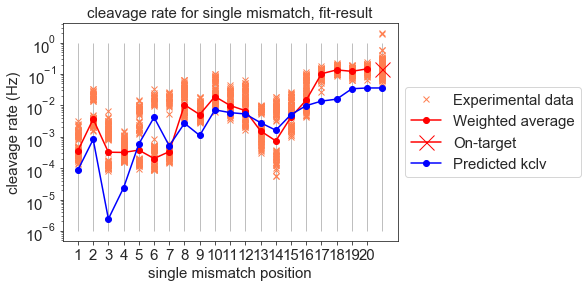

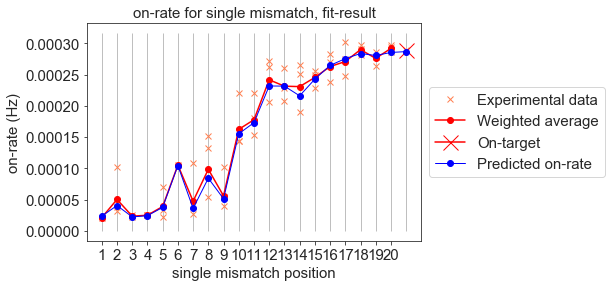

In [198]:
k = np.zeros(21)
on = np.zeros(21)
for i in range(1,guide+1):
    mismatch = [i]
    k[i-1],on[i-1] = clv.calc_clv_on(final_par_np,model_ID,mismatch,guide)
    
k[-1],on[-1] = clv.calc_clv_on(final_par_np,model_ID,[],guide)
    
plt.figure()
for i in range(21):
    plot1 = plt.plot((i+1)*np.ones(len(datacompclv[i])),datacompclv[i],marker='x',color='coral',linewidth=0,label='Experimental data')
plot2 = plt.plot(range(1,21),kclv[0:20],marker='o',color='r',label='Weighted average')
plot3 = plt.plot(21,kclv[20],marker='x',color='r',markersize=15,label='On-target')
plot4 = plt.semilogy(range(1,22),k,color='b',marker='o',label='Predicted kclv')
plt.legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0]],loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('cleavage rate (Hz)', fontsize=15)
plt.title('cleavage rate for single mismatch, fit-result', fontsize=15)
plt.xticks(range(1,21),fontsize=15)
plt.yticks(fontsize=15)
plt.vlines(range(1,22),10**-6,1,color='grey',linewidth=0.5);
#plt.axis([0,22,10**(-5),10**(0)]);

plt.figure()
for i in range(21):
    plot1 = plt.plot((i+1)*np.ones(len(datacompon[i])),datacompon[i],marker='x',color='coral',linewidth=0,label='Experimental data')
plot2 = plt.plot(range(1,21),kon[0:20],marker='o',color='r',label='Weighted average')
plot3 = plt.plot(21,kon[20],marker='x',color='r',markersize=15,label='On-target')
plot4 = plt.plot(range(1,22),on,marker='o',linewidth=1,color='blue',label='Predicted on-rate')
plt.legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0]],loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('on-rate (Hz)', fontsize=15)
plt.title('on-rate for single mismatch, fit-result', fontsize=15)
plt.xticks(range(1,21),fontsize=15)
plt.yticks(fontsize=15)
plt.vlines(range(1,22),0,10**-3.5,color='grey',linewidth=0.5);

## Double mismatches

Text(0.5,1,'on-rate double mismatches \ntop=model bottom=experiment')

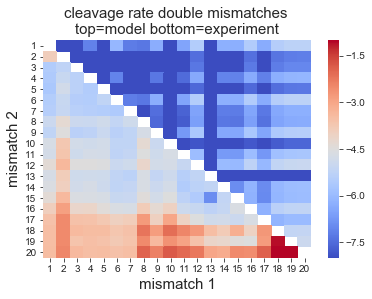

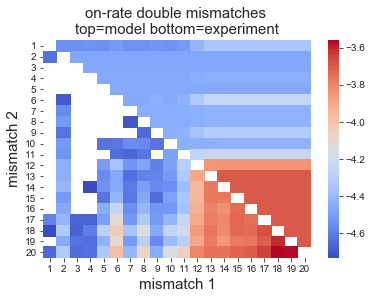

In [195]:
data_exp = pd.read_csv(path_data + filename_data)
_, k_matrix_experiment = pltData.plot_double_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, Ng=20, data_name='cleavage rate (Hz)', Plot=False, logplot=True,
                        SaveFigures=False, figure_name='./Figure.pdf')
k_matrix_experiment.fillna(0, inplace=True)

k_matrix = np.zeros([20,20])
on_matrix = np.zeros([20,20])

for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_matrix[i-1,j-1], on_matrix[i-1,j-1] = np.log10(clv.calc_clv_on(final_par_np,model_ID,mismatch_positions,guide))
        
        
k_df = pd.DataFrame(k_matrix, index=range(1, 21), columns=range(1, 21))
on_df = pd.DataFrame(on_matrix, index=range(1,21), columns=range(1,21))
combined_df_wa = k_df + k_double_df
combined_df_median = k_df + k_matrix_experiment
combined_on = on_df + on_double_df

for i in range(1,21):
    combined_df_wa[i].loc[i]=np.nan
    combined_df_median[i].loc[i]=np.nan
    combined_on[i].loc[i] = np.nan

plt.figure()
sns.heatmap(combined_df_wa, cmap='coolwarm', cbar=True, vmin=-8, vmax = -1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('cleavage rate double mismatches \ntop=model bottom=experiment', fontsize=15)

plt.figure()
sns.heatmap(combined_on,cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('on-rate double mismatches \ntop=model bottom=experiment', fontsize=15)

## Chi squared evolution

(array([100000., 150000., 200000., 250000., 300000., 350000., 400000.,
        450000., 500000., 550000.]), <a list of 10 Text yticklabel objects>)

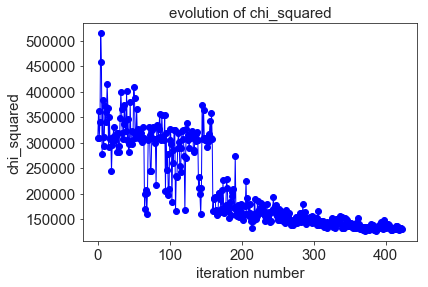

In [170]:
plt.plot(chi, marker='o', linewidth=1, color='blue')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('chi_squared', fontsize=15)
plt.title('evolution of chi_squared', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

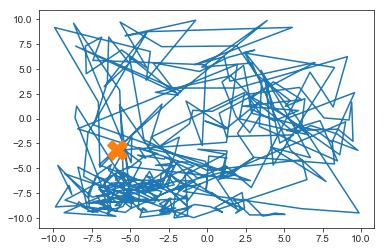

In [180]:
plt.plot(par1,par2)
plt.plot(par1[0],par2[0],marker='X',markersize=20)